In [1]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests
import glob
from matplotlib import pyplot as plt
import easyocr
import torch
from torchvision.transforms.functional import crop
import numpy as np

In [2]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-handwritten')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
for fname in glob.glob('../data/examples/handwritten/*'):
    image = Image.open(fname).convert("RGB")
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    plt.imshow(image)
    plt.show()
    print(generated_text)

In [4]:
for fname in glob.glob('../data/examples/handwritten/*'):
    image = Image.open(fname).convert("RGB")
    plt.imshow(image)
    plt.show()
    reader = easyocr.Reader(['ch_tra', 'en'])
    detections = reader.detect(np.asarray(image))
    for box in detections[0][0]:
        xmin, xmax, ymin, ymax = box
        cropped = crop(image, ymin, xmin, ymax-ymin, xmax-xmin)
        pixel_values = processor(images=cropped.convert("RGB"), return_tensors="pt").pixel_values
        generated_ids = model.generate(pixel_values)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
        print(generated_text)  

In [5]:
# download iam testset
!gdown https://drive.google.com/uc?id=1vDVJfZfGTpj4n6jDRZ9-XPj9mJ5GJiW4 -O ../data/handwritten/IAM.tar.gz


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Downloading...
From (uriginal): https://drive.google.com/uc?id=1vDVJfZfGTpj4n6jDRZ9-XPj9mJ5GJiW4
From (redirected): https://drive.google.com/uc?id=1vDVJfZfGTpj4n6jDRZ9-XPj9mJ5GJiW4&confirm=t&uuid=c1eb9ac3-08b0-41f1-b7b6-d5df30704e2b
To: C:\Users\Chris Wendler\Documents\git\2023\OCR-ensemble\data\handwritten\IAM.tar.gz

  0%|          | 0.00/93.8M [00:00<?, ?B/s]
  7%|6         | 6.29M/93.8M [00:00<00:01, 61.3MB/s]
 19%|#9        | 17.8M/93.8M [00:00<00:00, 91.4MB/s]
 32%|###1      | 29.9M/93.8M [00:00<00:00, 104MB/s] 
 45%|####4     | 41.9M/93.8M [00:00<00:00, 110MB/s]
 58%|#####7    | 54.0M/93.8M [00:00<00:00, 113MB/s]
 70%|#######   | 66.1M/93.8M [00:00<00:00, 114MB/s]
 83%|########3 | 78.1M/93.8M [00:00<00:00, 116MB/s]
 96%|#########6| 90.2M/93.8M [00:00<00:00, 115MB/s]
100%|##########| 93.8M/93.8M [00:00<00:00, 110MB/s]


In [6]:
!tar -xvf ../data/handwritten/IAM.tar.gz -C ../data/handwritten/

x IAM/
x IAM/gt_test.txt
x IAM/gpt2.dict.txt
x IAM/image/
x IAM/image/c04-110-00.jpg
x IAM/image/c04-110-01.jpg
x IAM/image/c04-110-02.jpg
x IAM/image/c04-110-03.jpg
x IAM/image/c04-116-00.jpg
x IAM/image/c04-116-01.jpg
x IAM/image/c04-116-02.jpg
x IAM/image/c04-116-03.jpg
x IAM/image/c04-134-00.jpg
x IAM/image/c04-134-01.jpg
x IAM/image/c04-134-02.jpg
x IAM/image/c04-134-03.jpg
x IAM/image/c04-134-04.jpg
x IAM/image/c04-134-05.jpg
x IAM/image/c04-134-06.jpg
x IAM/image/c04-139-00.jpg
x IAM/image/c04-139-01.jpg
x IAM/image/c04-139-02.jpg
x IAM/image/c04-139-03.jpg
x IAM/image/c04-139-04.jpg
x IAM/image/c04-139-05.jpg
x IAM/image/c04-139-06.jpg
x IAM/image/c04-144-00.jpg
x IAM/image/c04-144-01.jpg
x IAM/image/c04-144-02.jpg
x IAM/image/c04-144-03.jpg
x IAM/image/c04-144-04.jpg
x IAM/image/c04-144-05.jpg
x IAM/image/c04-144-06.jpg
x IAM/image/c04-144-07.jpg
x IAM/image/c04-150-00.jpg
x IAM/image/c04-150-01.jpg
x IAM/image/c04-150-02.jpg
x IAM/image/c04-150-03.jpg
x IAM/image/c04-150-04.j

C:\Users\Chris Wendler\AppData\Local\pypoetry\Cache\virtualenvs\ocr-ensemble-EUJa140X-py3.9\lib\site-packages\transformers\generation\utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


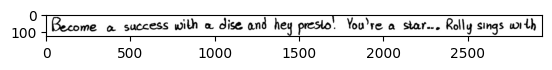

Become a success with a disc and key presto! You're a star... Rolly


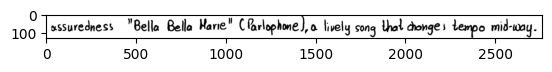

assuredness " Bella Bella Marie " ( Parlophone ), a lively song that change


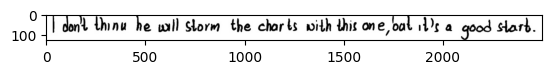

I don't think he will storm the charts with this one, but it's a good start


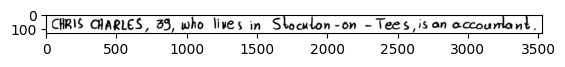

CHRIS CHARLES, 39, who lives in Stoculon-on - Tees


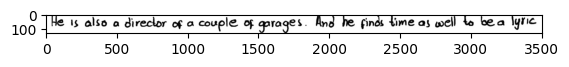

He is also a director of a couple of garages. And he finds time as well to


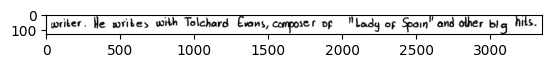

writer. He writes with Tolchard Evans, composer of " Lady of Spain " and other big


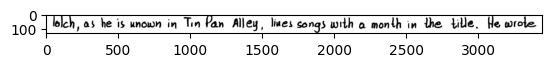

Tolch, as he is known in Tin Pan Alley, lives songs with a month in


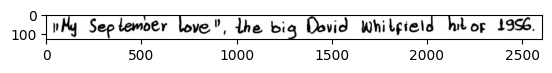

" My September love, " the big David Whitfield hit of 1956.


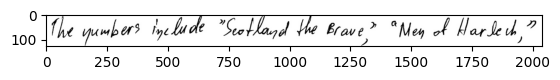

The yumbers include " Scotland the brave, " Men of Harlech, "


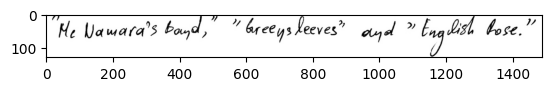

" McNamara's band, " " breeysleeves " and " English lose. "


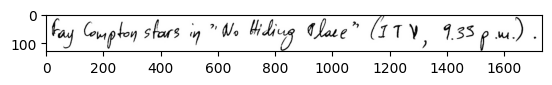

fay Compton stars in " No. Hiding Place " ( ITV, 9.35 p


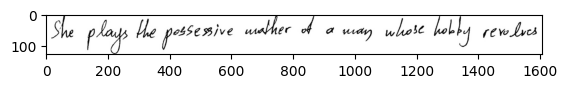

She plays the possessive matter of a man whose hobby revolves


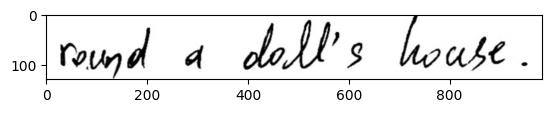

round a doll's house.


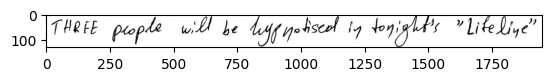

THREE people will be hypothesized in tonight's " Lifetime "


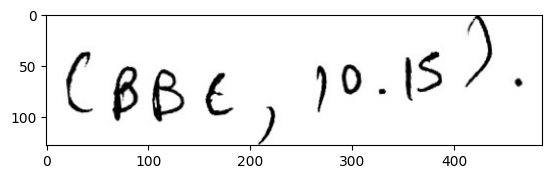

CBBE, 10.15 ).


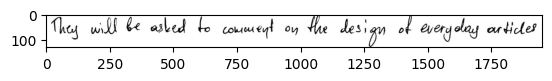

They will be asked to comment on the design of everyday articles


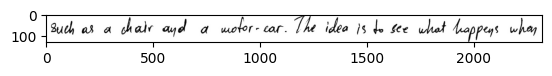

such as a chair and a motor-car. The idea is to see what happens when


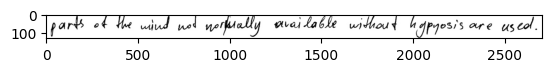

parts of the mind not normally available without hypnosis are used.


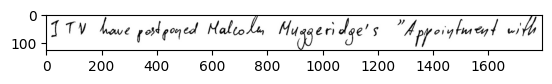

ITV have postponed Malcolm Muggeridge's " Appointment with


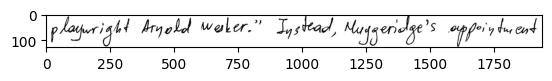

playwright Arnold Welker. " Instead, Muggeridge's appointment


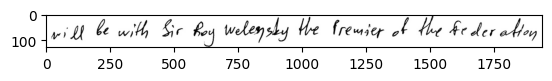

will be with Sir Roy Welensky the Premier of the Federation


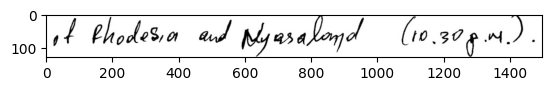

of Rhodesia and Nyasaland ( 10.30 g.m. ).


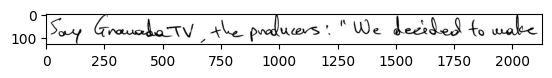

Say Granada TV, the producers : " We decided to make


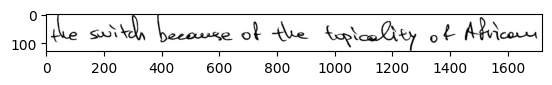

the switch because of the topicality of African


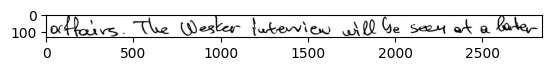

affairs. The Wesker interview will be seen at a later


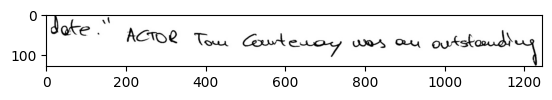

date. " ACTOR Tom Cantenary was an outstanding


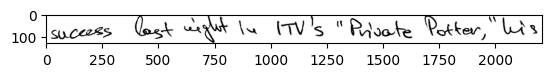

success last night in ITV's " Private Potter, " his


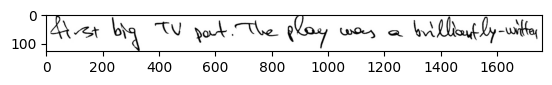

first big TV part. The play was a brilliantly-witter


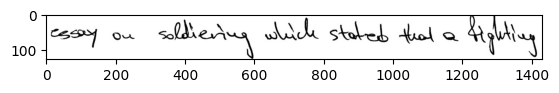

essey on soldiering which started that a fighting


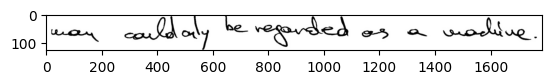

man couldnably be regarded as a machine.


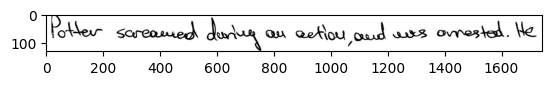

Potter screamed during an action, and was arrested. He


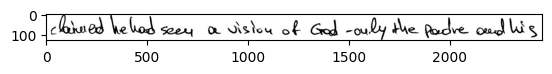

claimed he had seen a vision of God - only the padre and his


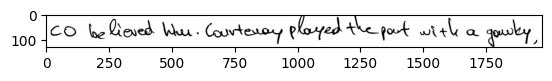

co believed Mr. Gurtenay played the part with a gawky,


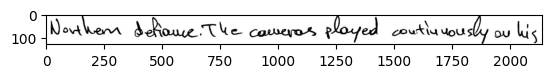

Northern defence. The cameras played continuously on his


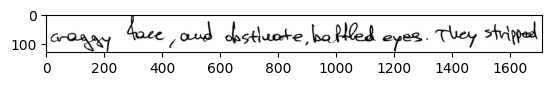

craggy face, and obstinate, battled eyes. They stripped


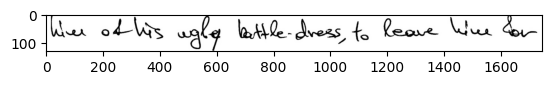

When others might be battle-dress, to leave him for


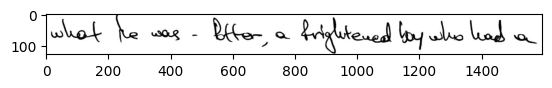

what he was - bitter, a frightened boy who had a


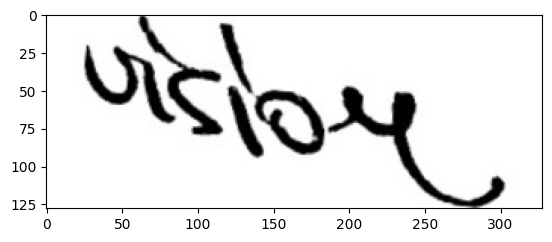

history.


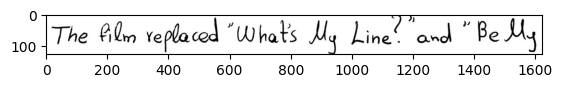

The film replaced'What's My Line? " and " Be My


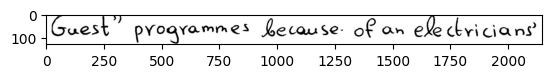

Guest " programmes because of an electricians'


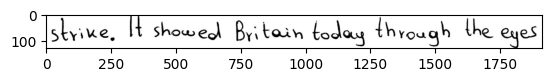

strike. It showed Britain today through the eyes


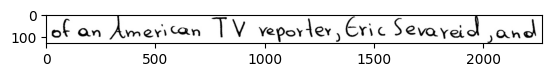

of an American TV reporter, Eric Sevareid, and


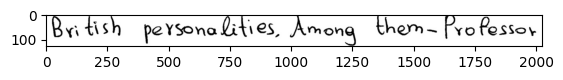

British personalities. Among them-Professor


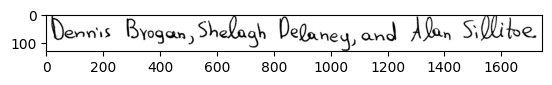

Dennis Brogan, Shelagh Delaney, and Alan Sillitoe


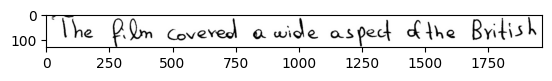

The film covered a wide aspect of the British


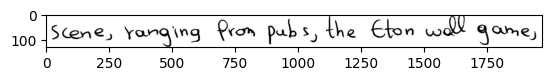

scene, ranging from pubs, the Eton will game,


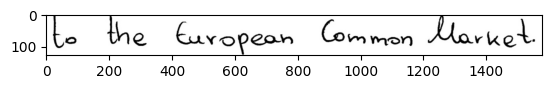

to the European Common Market.


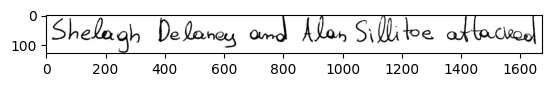

Shelagh Delaney and Alan Sillitoe attacked


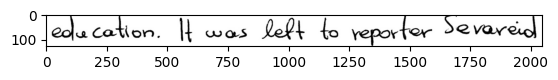

education. It was left to reporter Serareid


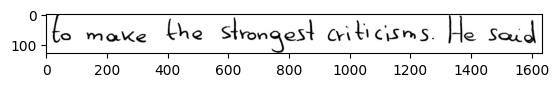

to make the strongest criticisms. He said


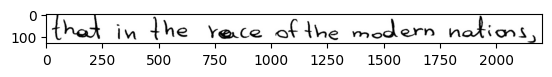

that in the race of the modern nations,


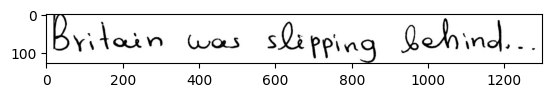

Britain was sleeping behind....


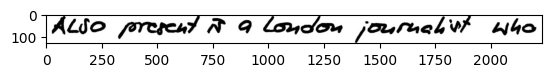

ALSO present is a London journalist who


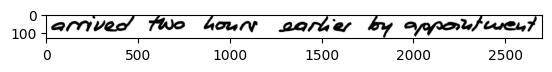

arrived two hours earlier by appointment


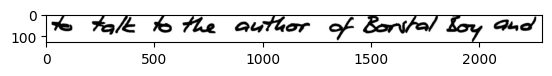

to talk to the author of Borstal Boy and


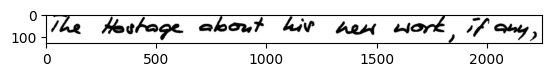

The Hostage about his new work, if any,


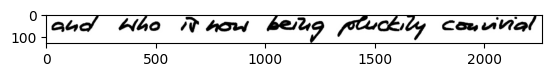

and who is now being quickly carnival


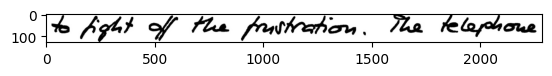

to fight off the frustration. The telephone


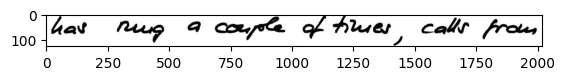

has run a couple of times, calls from


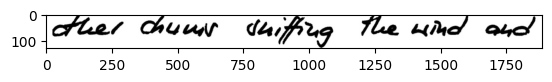

other chums sniffing the wind and


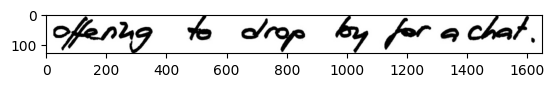

offering to drop by for a chat.


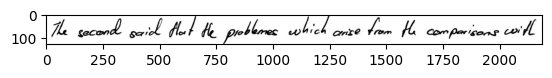

The second said that the problems which arise from the comparisons with


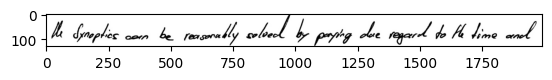

the Symphics can be reasonably solved by paying due regard to the time and


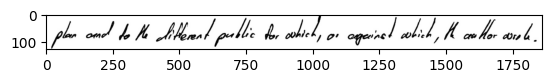

plan and to the different public for which, or against which, Mr. author wask.


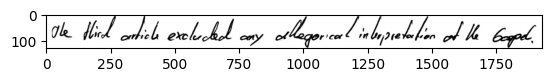

The third article excluded any allegorical interpretation of the God.


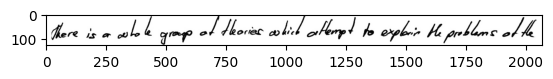

There is a whole group of theories out attempt to explain the problems of the


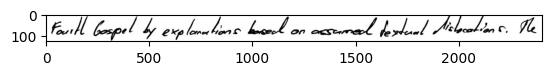

Fourth Gospel by explanations based on assumed textual distinctions. The


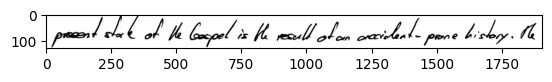

print stake of the Gospel is the result of an accident-prone history. He


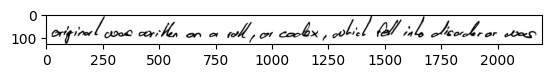

original was written on a roll, or cookex, which fell into disorder or was


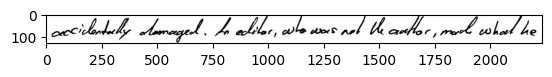

occidentally damaged. In editor, who was not the author, made what he


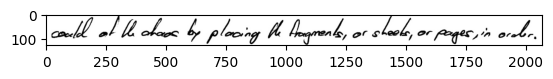

could at the chaos by placing the fragments, or sheets, or pages, in order.


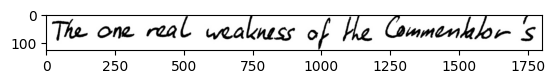

The one real weakness of the Commentator's


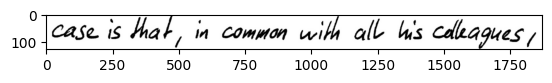

case is that, in common with all his colleagues,


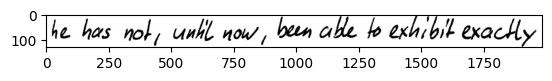

he has not, until now, been able to exhibit exactly


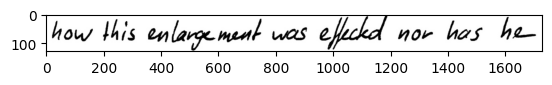

how this enlargement was effected nor has he


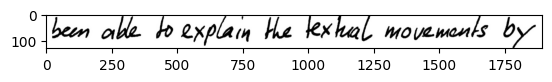

been able to explain the textual movements by


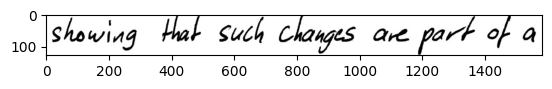

showing that such changes are part of a


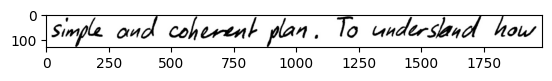

simple and coherent plan. To understand how


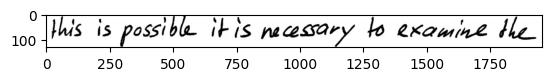

this is possible it is necessary to examine the


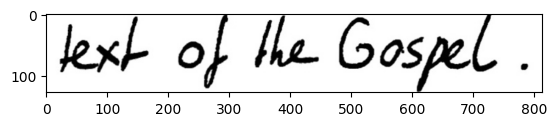

text of the Gospel.


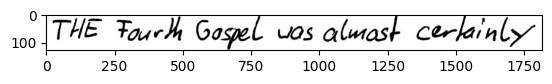

THE Fourth Gospel was almost certainly


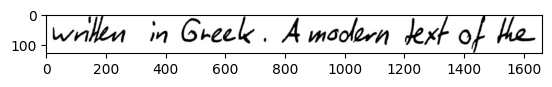

written in Greek. A modern text of the


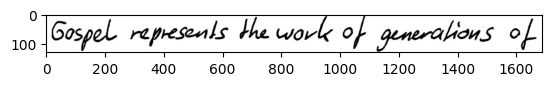

Gospel represents the work of generations of


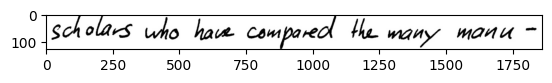

scholars who have compared the many manu-


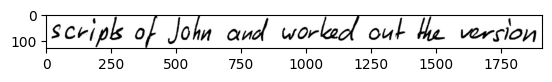

scripts of John and worked out the version


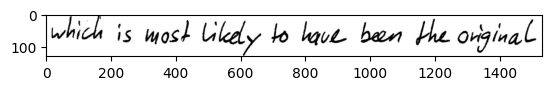

which is most likely to have been the original


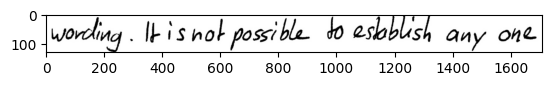

wording. It is not possible to establish any one


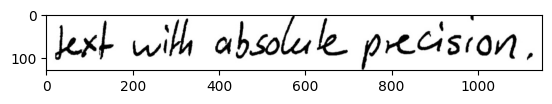

text with absolute precision.


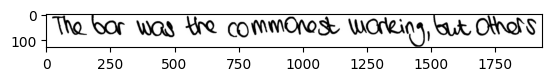

The bar was the commonest working, but others


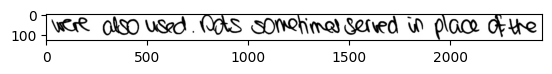

were also used. Dots sometimes served in place of the


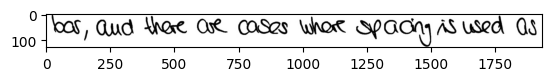

bar, and there are cases where spacing is used as


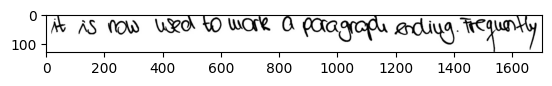

it is now used to work a paragraph ending. Frequently


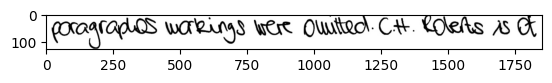

paragraphics markings were omitted. C.H. Roberts is at


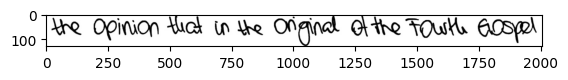

the opinion that in the original of the Fourth Gospel


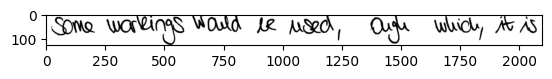

some markings would be used, high which, it is


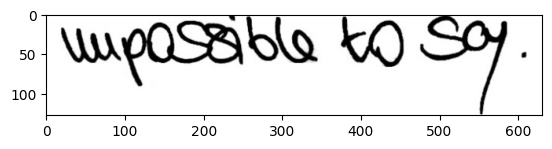

impossible to say.


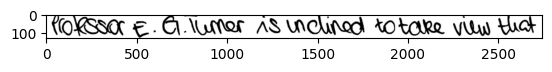

Professor E. G. Turner is inclined to take view that


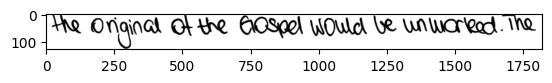

the original of the Gospel would be unworcled. The


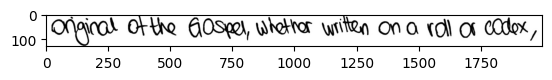

original of the Gospel, whether written on a roll or codex,


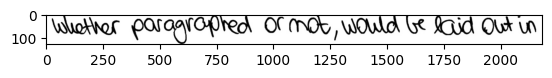

whether parographed or not, would be laid out in


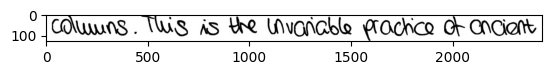

columns. This is the invariable practice of ancient


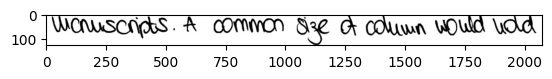

manuscripts. A common size of column would hold


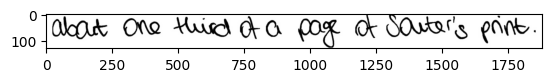

about one third of a page of Souter's print.


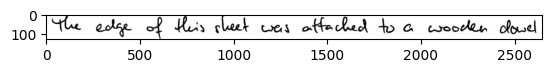

The edge of this sheet was attached to a wooden douel


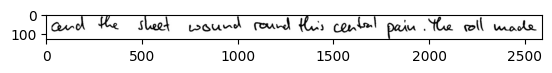

cent the sheet wound round this central pain. The roll made


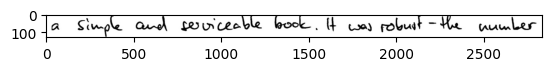

a simple and serviceable book. It was robust - the number


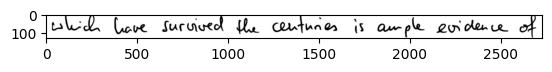

which have survived the centuries is ample evidence of


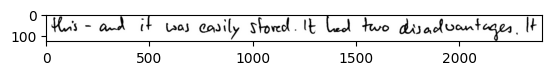

this - and it was easily stored. It had two disadvantages. It


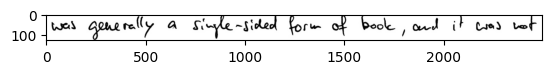

was generally a single-sided form of book, and it was not


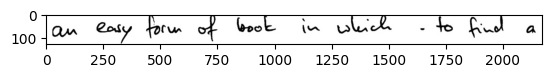

an easy form of book in which - to find a


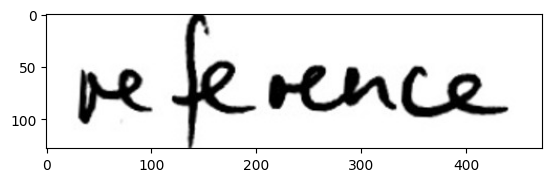

reference.


In [ ]:
for fname in glob.glob('../data/handwritten/IAM/image/*'):
    image = Image.open(fname).convert("RGB")
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    plt.imshow(image)
    plt.show()
    print(generated_text)